In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import keras
!pip install tensorflow-gpu
import keras_applications
import keras_preprocessing
import tensorflow_datasets
import tensorflow.keras
!pip install pytesseract
!pip install tesseract

In [29]:
!pip install extra-keras-datasets

In [0]:
from extra_keras_datasets import emnist
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='bymerge')

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

In [0]:
train_images = (input_train)
train_labels = (target_train)
test_images = (input_test)
test_lables = (target_test)

In [34]:
#normalize pixel values
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
#flattining
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
print(train_images.shape)
print(test_images.shape)

(697932, 784)
(116323, 784)


In [0]:
#building the model with 3 layers ,,, 2 with 64 neurons and relu function
model = Sequential()
model.add( Dense(64, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add(Dense(47, activation='softmax'))

In [0]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [37]:
model.fit(
    train_images,
     to_categorical(train_labels),
     epochs = 5,
     batch_size=32,
)

Epoch 1/5
697932/697932 [==============================] - 61s 87us/step - loss: 0.6860 - accuracy: 0.7867
Epoch 2/5
697932/697932 [==============================] - 58s 83us/step - loss: 0.5152 - accuracy: 0.8308
Epoch 3/5
697932/697932 [==============================] - 59s 84us/step - loss: 0.4836 - accuracy: 0.8395
Epoch 4/5
697932/697932 [==============================] - 59s 84us/step - loss: 0.4689 - accuracy: 0.8431
Epoch 5/5
697932/697932 [==============================] - 59s 85us/step - loss: 0.4584 - accuracy: 0.8463


In [38]:
model.evaluate(
    test_images,
     to_categorical(test_lables)
)

116323/116323 [==============================] - 6s 48us/step


[0.4678184116459712, 0.8458860516548157]

In [0]:
model.save_weights('model.h5')

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [41]:
predictions = model.predict(test_images[1:5])
print(np.argmax(predictions, axis = 1))
print(test_lables[:5])

[22 28  0 12]
[24 22 28  0  5]


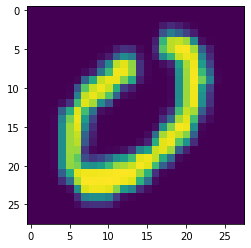

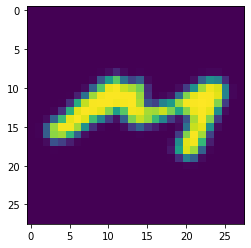

In [42]:
for i in range(0,2):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()

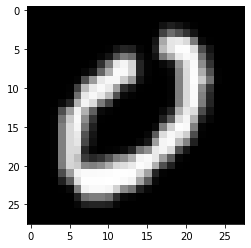

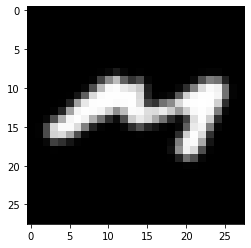

In [44]:
for i in range(0,2):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [0]:
model2 = Sequential()
model.add( Dense(64, activation='relu', input_dim=784))
model.add( Dense(128, activation='relu'))
model.add( Dense(64, activation='sigmoid'))
model.add(Dense(47, activation='softmax'))

In [0]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
model.fit(
    train_images,
     to_categorical(train_labels),
     epochs = 7,
     batch_size=32,
)

Epoch 1/7
697932/697932 [==============================] - 85s 122us/step - loss: 1.2349 - accuracy: 0.6531
Epoch 2/7
697932/697932 [==============================] - 85s 122us/step - loss: 0.7436 - accuracy: 0.7808
Epoch 3/7
697932/697932 [==============================] - 84s 121us/step - loss: 0.6204 - accuracy: 0.8102
Epoch 4/7
697932/697932 [==============================] - 84s 121us/step - loss: 0.5619 - accuracy: 0.8232
Epoch 5/7
697932/697932 [==============================] - 81s 116us/step - loss: 0.5317 - accuracy: 0.8298
Epoch 6/7
697932/697932 [==============================] - 85s 122us/step - loss: 0.5133 - accuracy: 0.8340
Epoch 7/7
697932/697932 [==============================] - 85s 122us/step - loss: 0.5013 - accuracy: 0.8366


In [50]:
predictions = model.predict(test_images[1:5])
print(np.argmax(predictions, axis = 1))
print(test_lables[:5])

[22 28  0  5]
[24 22 28  0  5]


In [51]:
!pip install pillow
!pip install pytesseract
!pip install imutils

In [0]:
import cv2
import pytesseract
import imutils

In [53]:
!wget https://github.com/tesseract-ocr/tessdata/raw/master/eng.traineddata
!sudo mv -v eng.traineddata /usr/local/share/tessdata/

--2020-05-15 22:58:48--  https://github.com/tesseract-ocr/tessdata/raw/master/eng.traineddata
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/master/eng.traineddata [following]
--2020-05-15 22:58:49--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/master/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23466654 (22M) [application/octet-stream]
Saving to: ‘eng.traineddata’

eng.traineddata     100%[===================>]  22.38M  71.8MB/s    in 0.3s    

2020-05-15 22:58:50 (71.8 MB/s) - ‘eng.traineddata’ saved [23466654/23466654]

mv: cannot move 'eng.t

In [54]:
!workon cv_tesseract
!pip install opencv-contrib-python imutils pytesseract pillow

/bin/bash: workon: command not found
